In [38]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark

In [39]:

import ibmos2spark
# @hidden_cell
credentials = {
    'endpoint': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'service_id': 'iam-ServiceId-56ce77ac-9d82-41cc-96e9-1a4689ce5806',
    'iam_service_endpoint': 'https://iam.bluemix.net/oidc/token',
    'api_key': 'fwcL_7HeZADPUr-jsL5P7scQbjmaoY0H3dqqC3Bsp9_5'
}

configuration_name = 'os_a2d5a67716ea4f0db7f2711634a21cc0_configs'
cos = ibmos2spark.CloudObjectStorage(sc, credentials, configuration_name, 'bluemix_cos')

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df_data_1 = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .option('inferSchema', 'true')\
  .load(cos.url('patientdataV6-1.csv', 'heartfailure-donotdelete-pr-iafaq9zj55qih4'))
df_data_1.take(5)


[Row(AVGHEARTBEATSPERMIN=93, PALPITATIONSPERDAY=22, CHOLESTEROL=163, BMI=25, HEARTFAILURE='N', AGE=49, SEX='F', FAMILYHISTORY='N', SMOKERLAST5YRS='N', EXERCISEMINPERWEEK=110),
 Row(AVGHEARTBEATSPERMIN=108, PALPITATIONSPERDAY=22, CHOLESTEROL=181, BMI=24, HEARTFAILURE='N', AGE=32, SEX='F', FAMILYHISTORY='N', SMOKERLAST5YRS='N', EXERCISEMINPERWEEK=192),
 Row(AVGHEARTBEATSPERMIN=86, PALPITATIONSPERDAY=0, CHOLESTEROL=239, BMI=20, HEARTFAILURE='N', AGE=60, SEX='F', FAMILYHISTORY='N', SMOKERLAST5YRS='N', EXERCISEMINPERWEEK=121),
 Row(AVGHEARTBEATSPERMIN=80, PALPITATIONSPERDAY=36, CHOLESTEROL=164, BMI=31, HEARTFAILURE='Y', AGE=45, SEX='F', FAMILYHISTORY='Y', SMOKERLAST5YRS='N', EXERCISEMINPERWEEK=141),
 Row(AVGHEARTBEATSPERMIN=66, PALPITATIONSPERDAY=36, CHOLESTEROL=185, BMI=23, HEARTFAILURE='N', AGE=39, SEX='F', FAMILYHISTORY='N', SMOKERLAST5YRS='N', EXERCISEMINPERWEEK=63)]

In [40]:
df_data_1.printSchema()

root
 |-- AVGHEARTBEATSPERMIN: integer (nullable = true)
 |-- PALPITATIONSPERDAY: integer (nullable = true)
 |-- CHOLESTEROL: integer (nullable = true)
 |-- BMI: integer (nullable = true)
 |-- HEARTFAILURE: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- SEX: string (nullable = true)
 |-- FAMILYHISTORY: string (nullable = true)
 |-- SMOKERLAST5YRS: string (nullable = true)
 |-- EXERCISEMINPERWEEK: integer (nullable = true)



In [41]:


df_data_1.show()



+-------------------+------------------+-----------+---+------------+---+---+-------------+--------------+------------------+
|AVGHEARTBEATSPERMIN|PALPITATIONSPERDAY|CHOLESTEROL|BMI|HEARTFAILURE|AGE|SEX|FAMILYHISTORY|SMOKERLAST5YRS|EXERCISEMINPERWEEK|
+-------------------+------------------+-----------+---+------------+---+---+-------------+--------------+------------------+
|                 93|                22|        163| 25|           N| 49|  F|            N|             N|               110|
|                108|                22|        181| 24|           N| 32|  F|            N|             N|               192|
|                 86|                 0|        239| 20|           N| 60|  F|            N|             N|               121|
|                 80|                36|        164| 31|           Y| 45|  F|            Y|             N|               141|
|                 66|                36|        185| 23|           N| 39|  F|            N|             N|            

In [42]:
df_data_1.select("AVGHEARTBEATSPERMIN", "PALPITATIONSPERDAY","CHOLESTEROL","BMI","HEARTFAILURE","SEX").toPandas().head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,SEX
0,93,22,163,25,N,F
1,108,22,181,24,N,F
2,86,0,239,20,N,F
3,80,36,164,31,Y,F
4,66,36,185,23,N,F


In [43]:
df_data_1.describe().show()

+-------+-------------------+------------------+------------------+------------------+------------+------------------+-----+-------------+--------------+------------------+
|summary|AVGHEARTBEATSPERMIN|PALPITATIONSPERDAY|       CHOLESTEROL|               BMI|HEARTFAILURE|               AGE|  SEX|FAMILYHISTORY|SMOKERLAST5YRS|EXERCISEMINPERWEEK|
+-------+-------------------+------------------+------------------+------------------+------------+------------------+-----+-------------+--------------+------------------+
|  count|              10800|             10800|             10800|             10800|       10800|             10800|10800|        10800|         10800|             10800|
|   mean|  87.11509259259259|20.423148148148147|195.08027777777778| 26.35972222222222|        null|49.965185185185184| null|         null|          null|119.72953703703703|
| stddev| 19.744375148984474|12.165320351622993|26.136731865042325|3.8201472810942136|        null|13.079280962015586| null|         nu

In [44]:


df_data_1.count()



10800

In [45]:
import pixiedust



In [48]:
!pip install --upgrade pixiedust
import pixiedust

  Using cached https://files.pythonhosted.org/packages/1a/70/1935c770cb3be6e3a8b78ced23d7e0f3b187f5cbfab4749523ed65d7c9b1/requests-2.23.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e4/8d/9e28e9af95739e6d2d2f8d4bef0b3432da40b7c3588fbad4298c1be09e48/geojson-2.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/74/46/e81907704ab203206769dee1385dc77e1407576ff8f50a0681d0a6b541be/colour-0.1.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/c4/ba46d44855e6eb1770a12edace5a165a0c6de13349f592b9036257f3c3d3/Markdown-3.2.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dd/ba/a0e6866057fc0bbd17192925c1d63a3b85cf522965de9bc02364d08e5b84/lxml-4.5.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.or

In [49]:
display(df_data_1)

AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
92,28,174,22,N,44,F,N,N,107
84,12,206,25,N,50,M,N,N,199
78,5,233,25,N,53,M,N,N,204
110,8,227,28,N,53,F,Y,N,39
97,11,170,32,N,38,F,N,N,222
82,15,154,26,N,46,F,N,N,227
88,38,154,22,N,47,F,N,N,204
100,30,212,23,N,72,M,N,N,22
100,17,153,32,N,49,M,N,N,244
82,3,218,27,Y,49,F,N,N,182


In [50]:
split_data = df_data_1.randomSplit([0.8, 0.20], 24)
train_data = split_data[0]
test_data = split_data[1]

print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 8637
Number of testing records : 2163


In [51]:
from pyspark.ml.feature import StringIndexer, IndexToString, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline, Model

In [52]:
stringIndexer_label = StringIndexer(inputCol="HEARTFAILURE", outputCol="label").fit(df_data_1)
stringIndexer_sex = StringIndexer(inputCol="SEX", outputCol="SEX_IX")
stringIndexer_famhist = StringIndexer(inputCol="FAMILYHISTORY", outputCol="FAMILYHISTORY_IX")
stringIndexer_smoker = StringIndexer(inputCol="SMOKERLAST5YRS", outputCol="SMOKERLAST5YRS_IX")

In [53]:
rf = RandomForestClassifier(labelCol="label", featuresCol="features")
lr = LogisticRegression()
nb = NaiveBayes(smoothing=1.0)

In [58]:
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel", labels=stringIndexer_label.labels)

In [59]:
vectorAssembler_features =  VectorAssembler(inputCols= ["AVGHEARTBEATSPERMIN","PALPITATIONSPERDAY", 
                                "CHOLESTEROL","BMI","AGE","SEX_IX","FAMILYHISTORY_IX",
                                "SMOKERLAST5YRS_IX","EXERCISEMINPERWEEK"], outputCol="features")
                                                      
transform_df_pipeline = Pipeline(stages=[stringIndexer_sex, stringIndexer_famhist, stringIndexer_smoker, vectorAssembler_features])
transformed_df = transform_df_pipeline.fit(df_data_1).transform(df_data_1)
transformed_df.show()

+-------------------+------------------+-----------+---+------------+---+---+-------------+--------------+------------------+------+----------------+-----------------+--------------------+
|AVGHEARTBEATSPERMIN|PALPITATIONSPERDAY|CHOLESTEROL|BMI|HEARTFAILURE|AGE|SEX|FAMILYHISTORY|SMOKERLAST5YRS|EXERCISEMINPERWEEK|SEX_IX|FAMILYHISTORY_IX|SMOKERLAST5YRS_IX|            features|
+-------------------+------------------+-----------+---+------------+---+---+-------------+--------------+------------------+------+----------------+-----------------+--------------------+
|                 93|                22|        163| 25|           N| 49|  F|            N|             N|               110|   1.0|             0.0|              0.0|[93.0,22.0,163.0,...|
|                108|                22|        181| 24|           N| 32|  F|            N|             N|               192|   1.0|             0.0|              0.0|[108.0,22.0,181.0...|
|                 86|                 0|        239| 20

In [60]:
pipeline1 = Pipeline(stages=[stringIndexer_label, stringIndexer_sex, 
                             stringIndexer_famhist, stringIndexer_smoker,
                             vectorAssembler_features, rf, labelConverter])
m1Name = "Random Forest"

pipeline2 = Pipeline(stages=[stringIndexer_label, stringIndexer_sex,
                            stringIndexer_famhist, stringIndexer_smoker,
                            vectorAssembler_features, lr, labelConverter])
m2Name = "Logistic Regression"

pipeline3 = Pipeline(stages=[stringIndexer_label, stringIndexer_sex,
                             stringIndexer_famhist, stringIndexer_smoker,
                             vectorAssembler_features, nb, labelConverter])
m3Name = "Naive Bayes"

In [61]:
model1 = pipeline1.fit(train_data)
model2 = pipeline2.fit(train_data)
model3 = pipeline3.fit(train_data)

In [62]:
from pyspark.sql.types import Row
import numpy as np
def getCMEntries(threshold):
    newThresholdDF = spark.sql("select label, p1, prediction as oldPrediction,"
    " case when p1 > " + str(threshold) + " then 1.0 else 0.0 end as newPrediction"
    " from inputToThreshold")
    newThresholdDF.registerTempTable("newThreshold")
    
    # Here is an SQL query to find true positives
    tpA = spark.sql("SELECT * FROM newThreshold WHERE label = 1 AND newprediction = 1")
    
    # Write an SQL query to find the number of false positives
    ### spark.sql("???")
    fpA = spark.sql("SELECT * FROM newThreshold WHERE label = 0 AND newprediction = 1")
    
    # Write an SQL query to find the number of false negatives
    ### spark.sql("???")
    fnA = spark.sql("SELECT * FROM newThreshold WHERE label = 1 AND newprediction = 0")
    
    # Write an SQL query to find the number of true negatives
    ### spark.sql("???")
    tnA = spark.sql("SELECT * FROM newThreshold WHERE label = 0 AND newprediction = 0")
    return (tpA.count(), fpA.count(), fnA.count(), tnA.count())

In [63]:


import numpy as np
numBins = 10
thresholds = np.array(range(0, numBins + 1))*1.0/numBins



In [64]:
def getModelThresholdStats(model_df, data):
    tp = np.array([i for i in range(0, numBins + 1 )])
    fp = np.array([i for i in range(0, numBins + 1 )])
    fn = np.array([i for i in range(0, numBins + 1 )])
    tn = np.array([i for i in range(0, numBins + 1 )])
    
    #generate dataframe to be used in thresholding:
    predictionsForROC = model_df.transform(data)
    predictionsForROC.registerTempTable("predictions")
    columnsForCM = spark.sql("select probability, prediction, label from predictions")
    extractedProbability = columnsForCM.rdd.map(lambda x: Row(p1 = np
    .asscalar(x[0][1]), prediction=x[1] , label=x[2])).toDF()
    extractedProbability.registerTempTable("inputToThreshold")
    
    # get the total number of positives and negatives in the predictions dataset:
    ### p = spark.sql("???").count()
    ### n = spark.sql("???").count()
    p = spark.sql("SELECT * from predictions WHERE label = 1").count()
    n = spark.sql("SELECT * from predictions WHERE label = 0").count()
                             
    # We know the number of true positives, etc. at the threshold edges:
    (tp[0],fp[0],fn[0],tn[0]) = (p, n, 0, 0)
    (tp[-1],fp[-1],fn[-1],tn[-1]) = (0, 0, p, n)
                             
    for (i, threshold) in zip(range(0, numBins + 1),thresholds):
        print(i, threshold)
        if (i>0 and i<numBins):
            (tp[i],fp[i],fn[i],tn[i]) = getCMEntries(threshold)
        print(tp[i],fp[i],fn[i],tn[i])
    
    # coercing to double precision from integers
    tp = tp*1.0; fp=fp*1.0; p=p*1.0; n=n*1.0
    
    # calculate the true positive and false positive rate
    ### tpr = ???
    ### fpr = ???
    tpr = tp/(tp + fn)
    fpr = fp/(fp + tn)
    
    # calculate Matthews Correlation Coefficient
    ### mcc = ???
    mcc = (tp * tn - fp * fn)/np.sqrt((tp + fp)*(tp + fn) * (tn + fp) * (tn + fn))
    
    # calculate accuracy as a function of threshold
    accThreshold = (tp + tn) / (p + n)
    
    # calculate the area under the curve
    auc = - np.array(
             [(fpr[i + 1] - fpr[i]) * 0.5 * (tpr[i + 1] + tpr[i]) for i in range(0,numBins)]
            ).sum()
                             
    return (tpr, fpr, mcc, accThreshold, auc)

In [68]:
print("getting stats for " + m1Name + ": train")
(tpr1,fpr1,mcc1,acc1,auc1) = getModelThresholdStats(model1, train_data)
print("getting stats for " + m1Name + ": test")
(tpr1Test,fpr1Test,mcc1Test,acc1Test,auc1Test) = getModelThresholdStats(model1, test_data)
print("getting stats for " + m2Name)
(tpr2,fpr2,mcc2,acc2,auc2) = getModelThresholdStats(model2, train_data)
print("getting stats for " + m1Name + ": test")
(tpr2Test,fpr2Test,mcc2Test,acc2Test,auc2Test) = getModelThresholdStats(model2, test_data)
print("getting stats for " + m3Name + ": train")
(tpr3,fpr3,mcc3,acc3,auc3) = getModelThresholdStats(model3, train_data)
print("getting stats for " + m3Name + ": test")
(tpr3Test,fpr3Test,mcc3Test,acc3Test,auc3Test) = getModelThresholdStats(model3, test_data)

getting stats for Random Forest: train
0 0.0
1427 7210 0 0
1 0.1
1064 2105 363 5105
2 0.2
901 910 526 6300
3 0.3
847 684 580 6526
4 0.4
579 238 848 6972
5 0.5
416 117 1011 7093
6 0.6
313 57 1114 7153
7 0.7
134 12 1293 7198
8 0.8
16 0 1411 7210
9 0.9
0 0 1427 7210
10 1.0
0 0 1427 7210
getting stats for Random Forest: test


/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in true_divide


0 0.0
361 1802 0 0
1 0.1
275 528 86 1274
2 0.2
233 209 128 1593
3 0.3
223 153 138 1649
4 0.4
151 62 210 1740
5 0.5
102 33 259 1769
6 0.6
72 16 289 1786
7 0.7
22 4 339 1798
8 0.8
6 0 355 1802
9 0.9
0 0 361 1802
10 1.0
0 0 361 1802
getting stats for Logistic Regression
0 0.0
1427 7210 0 0
1 0.1
1111 3023 316 4187
2 0.2
855 1060 572 6150
3 0.3
740 687 687 6523
4 0.4
595 429 832 6781
5 0.5
425 233 1002 6977
6 0.6
271 95 1156 7115
7 0.7
134 32 1293 7178
8 0.8
34 9 1393 7201
9 0.9
1 1 1426 7209
10 1.0
0 0 1427 7210
getting stats for Random Forest: test
0 0.0
361 1802 0 0
1 0.1
280 730 81 1072
2 0.2
226 247 135 1555
3 0.3
203 163 158 1639
4 0.4
161 109 200 1693
5 0.5
108 53 253 1749
6 0.6
67 26 294 1776
7 0.7
25 7 336 1795
8 0.8
8 1 353 1801
9 0.9
1 0 360 1802
10 1.0
0 0 361 1802
getting stats for Naive Bayes: train
0 0.0
1427 7210 0 0
1 0.1
876 3314 551 3896
2 0.2
841 3133 586 4077
3 0.3
809 2998 618 4212
4 0.4
785 2905 642 4305
5 0.5
770 2814 657 4396
6 0.6
742 2729 685 4481
7 0.7
715 2639 

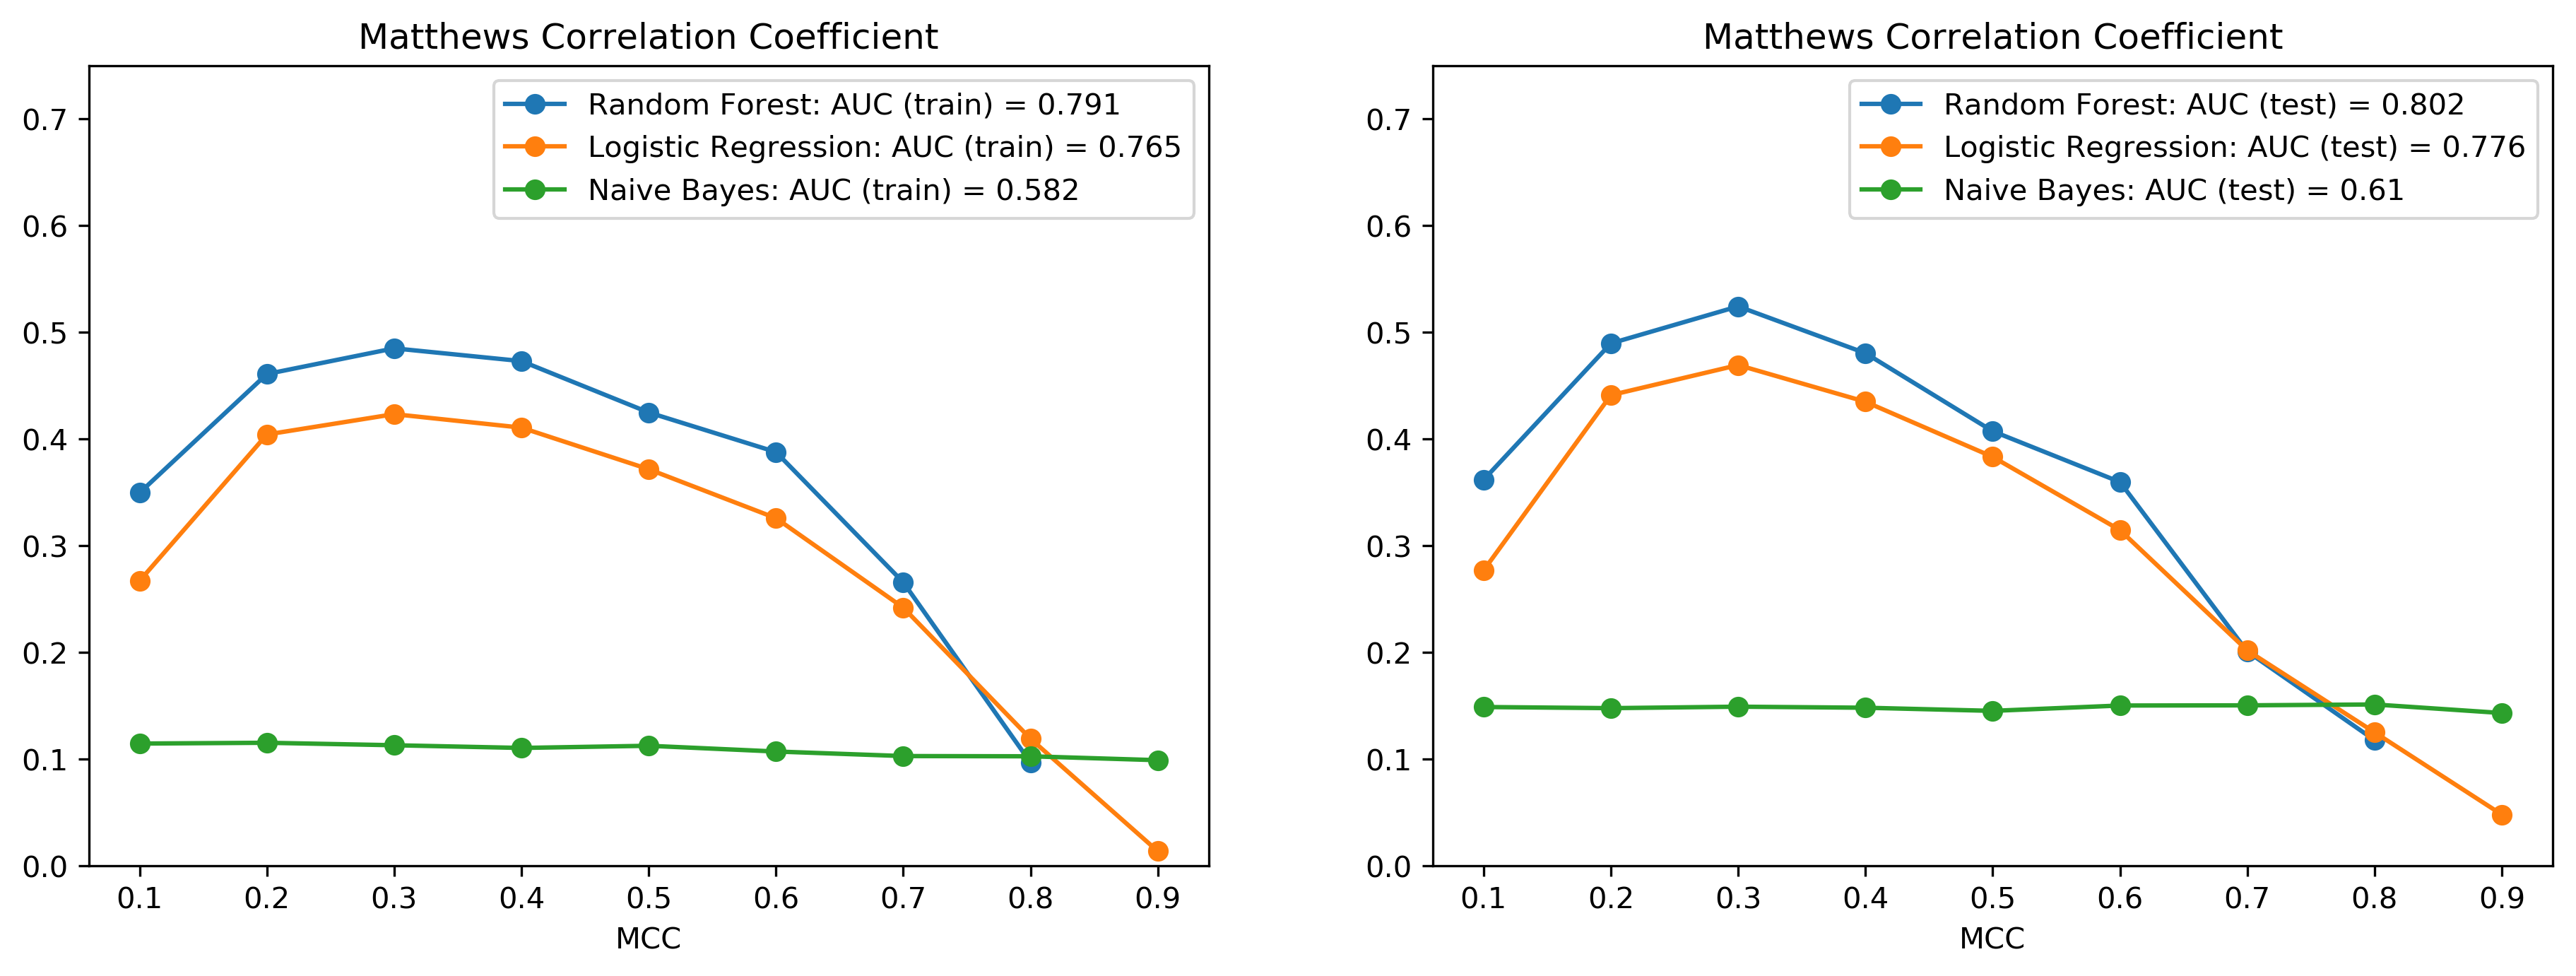

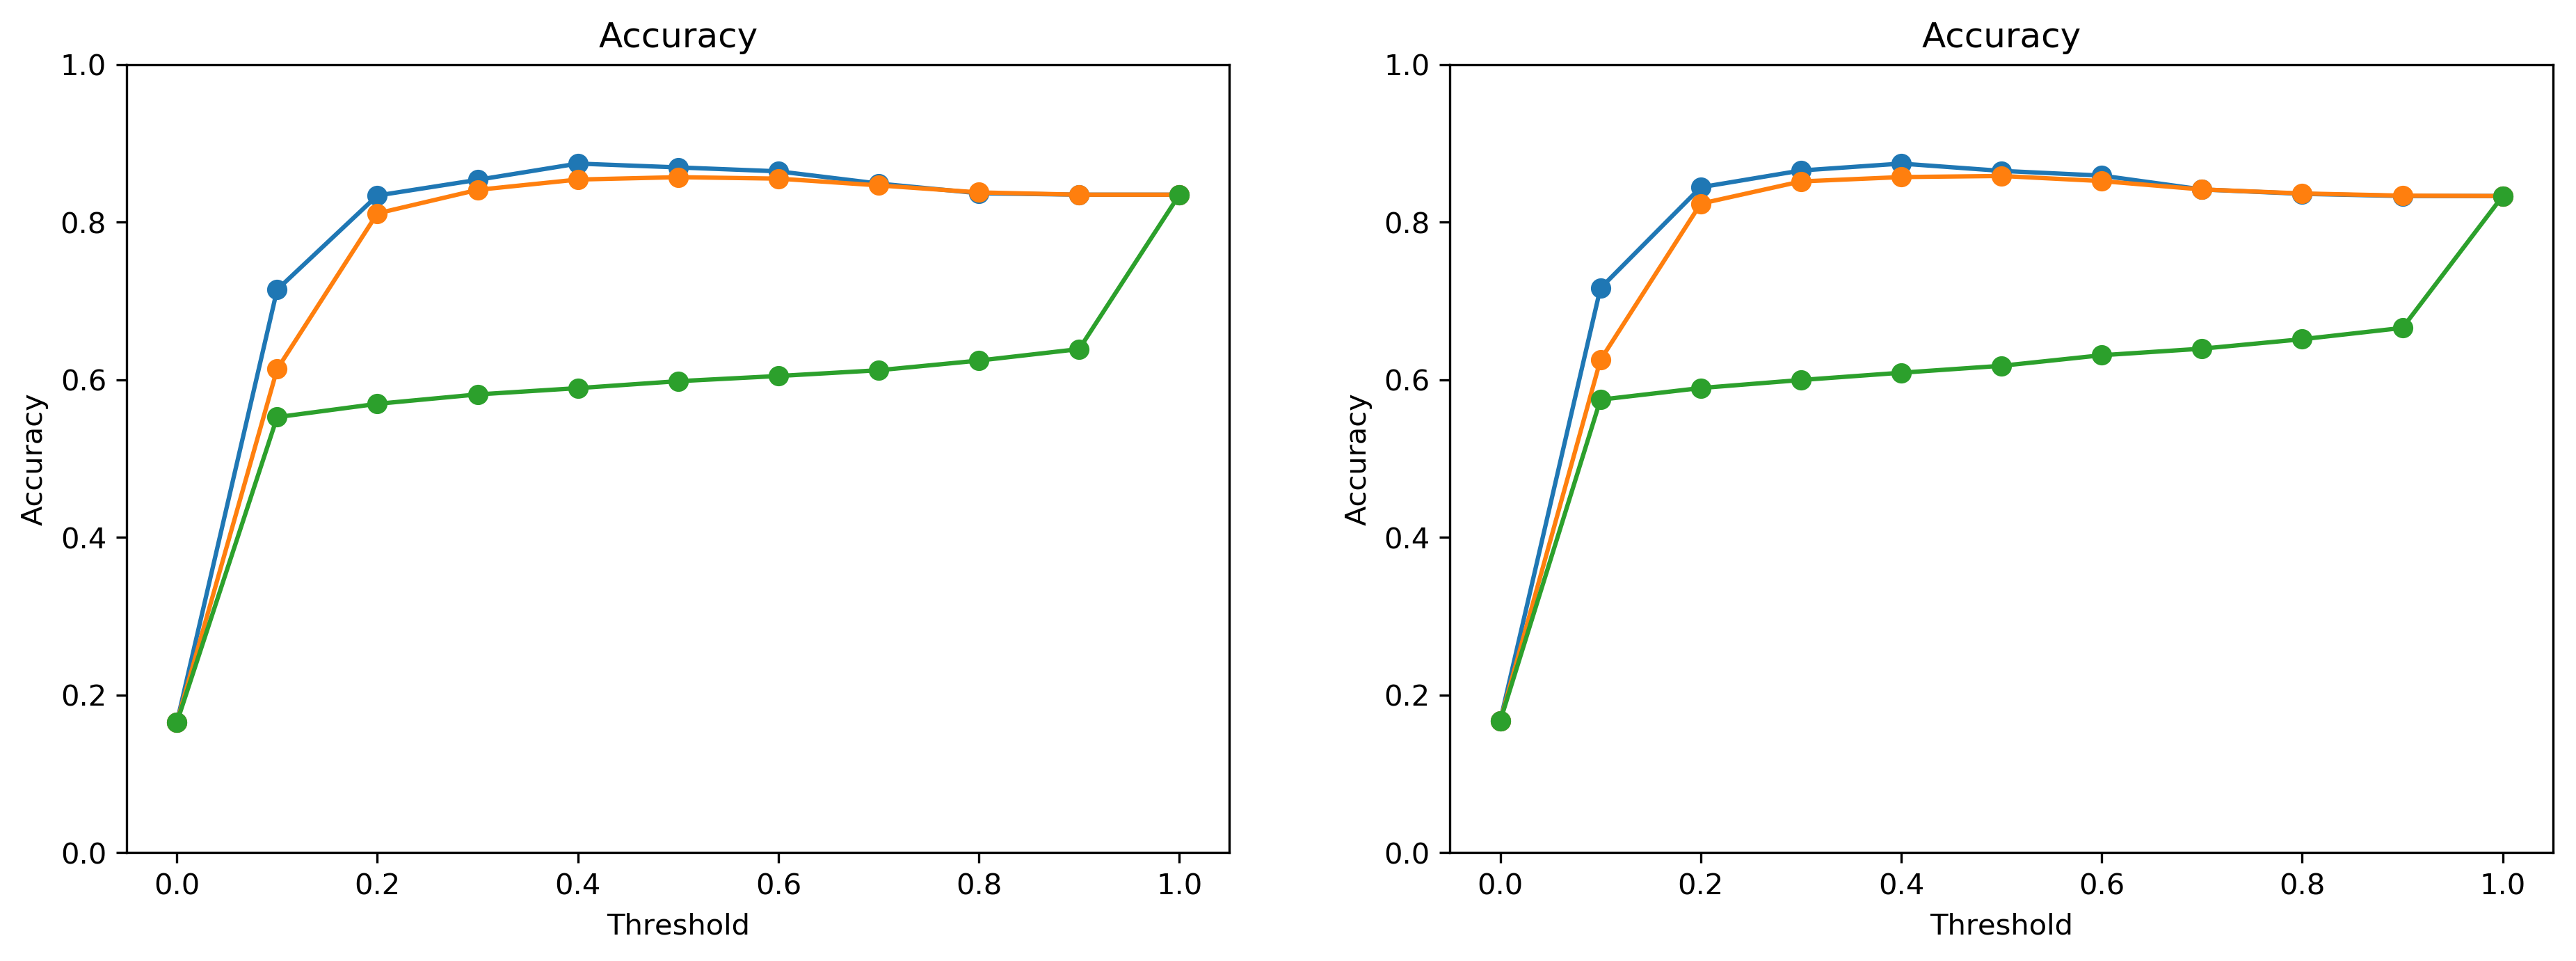

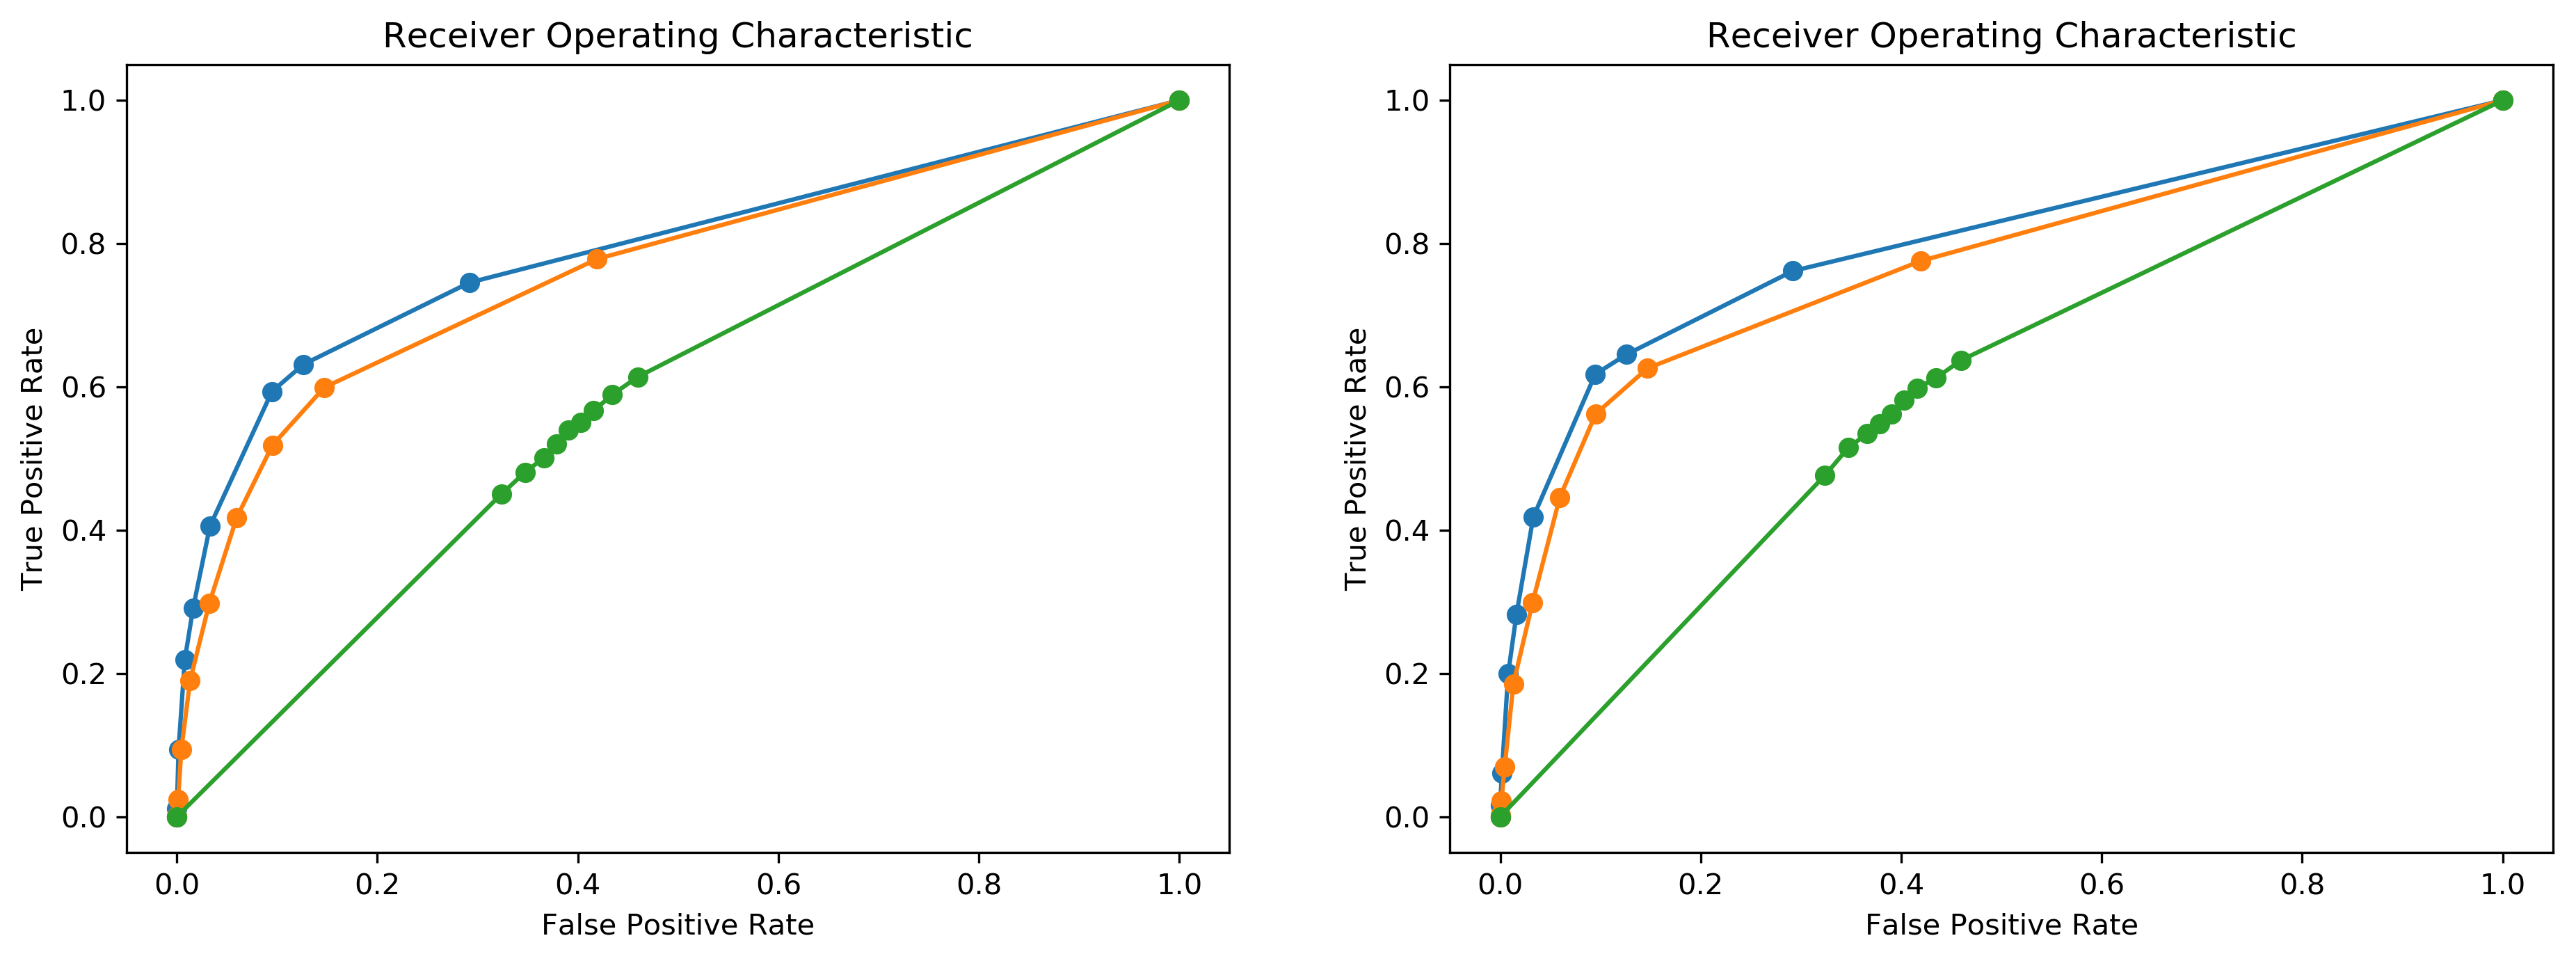

In [69]:
%matplotlib inline

import matplotlib.pyplot as plt

dpi = 300 #dots per square inch when plotting...higher resolution for publications.
plt.rcParams['figure.dpi']= dpi
plt.rcParams["figure.figsize"] = [4,1]

plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(121)
plt.plot(thresholds, mcc1, '-o')
plt.plot(thresholds, mcc2, '-o')
plt.plot(thresholds, mcc3, '-o')
plt.title("Matthews Correlation Coefficient")
plt.xlabel("Threshold")
plt.xlabel("MCC")
plt.ylim(0,0.75)
plt.legend([m1Name + ": AUC (train) = "+ str(round(auc1,3)),
m2Name + ": AUC (train) = "+ str(round(auc2,3)),
m3Name + ": AUC (train) = "+ str(round(auc3,3))])
plt.subplot(122)
plt.plot( thresholds, mcc1Test, '-o')
plt.plot( thresholds, mcc2Test, '-o')
plt.plot( thresholds, mcc3Test, '-o')
plt.title("Matthews Correlation Coefficient")
plt.xlabel("Threshold")
plt.xlabel("MCC")
plt.ylim(0,0.75)
plt.legend([m1Name + ": AUC (test) = "+ str(round(auc1Test,3)),
m2Name + ": AUC (test) = "+ str(round(auc2Test,3)),
m3Name + ": AUC (test) = "+ str(round(auc3Test,3))])
plt.show()
plt.subplot(121)
plt.plot(thresholds, acc1,'-o')
plt.plot(thresholds, acc2,'-o')
plt.plot(thresholds, acc3,'-o')
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Threshold")
plt.ylim(0,1.0)
plt.subplot(122)
plt.plot(thresholds, acc1Test,'-o')
plt.plot(thresholds, acc2Test,'-o')
plt.plot(thresholds, acc3Test,'-o')
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Threshold")
plt.ylim(0,1.0)
plt.show()
plt.subplot(121)
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1,'-o')
plt.plot(fpr2, tpr2,'-o')
plt.plot(fpr3, tpr3,'-o')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.subplot(122)
plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1Test,'-o')
plt.plot(fpr2, tpr2Test,'-o')
plt.plot(fpr3, tpr3Test,'-o')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

/opt/ibm/conda/miniconda3.6/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


(0, 1)

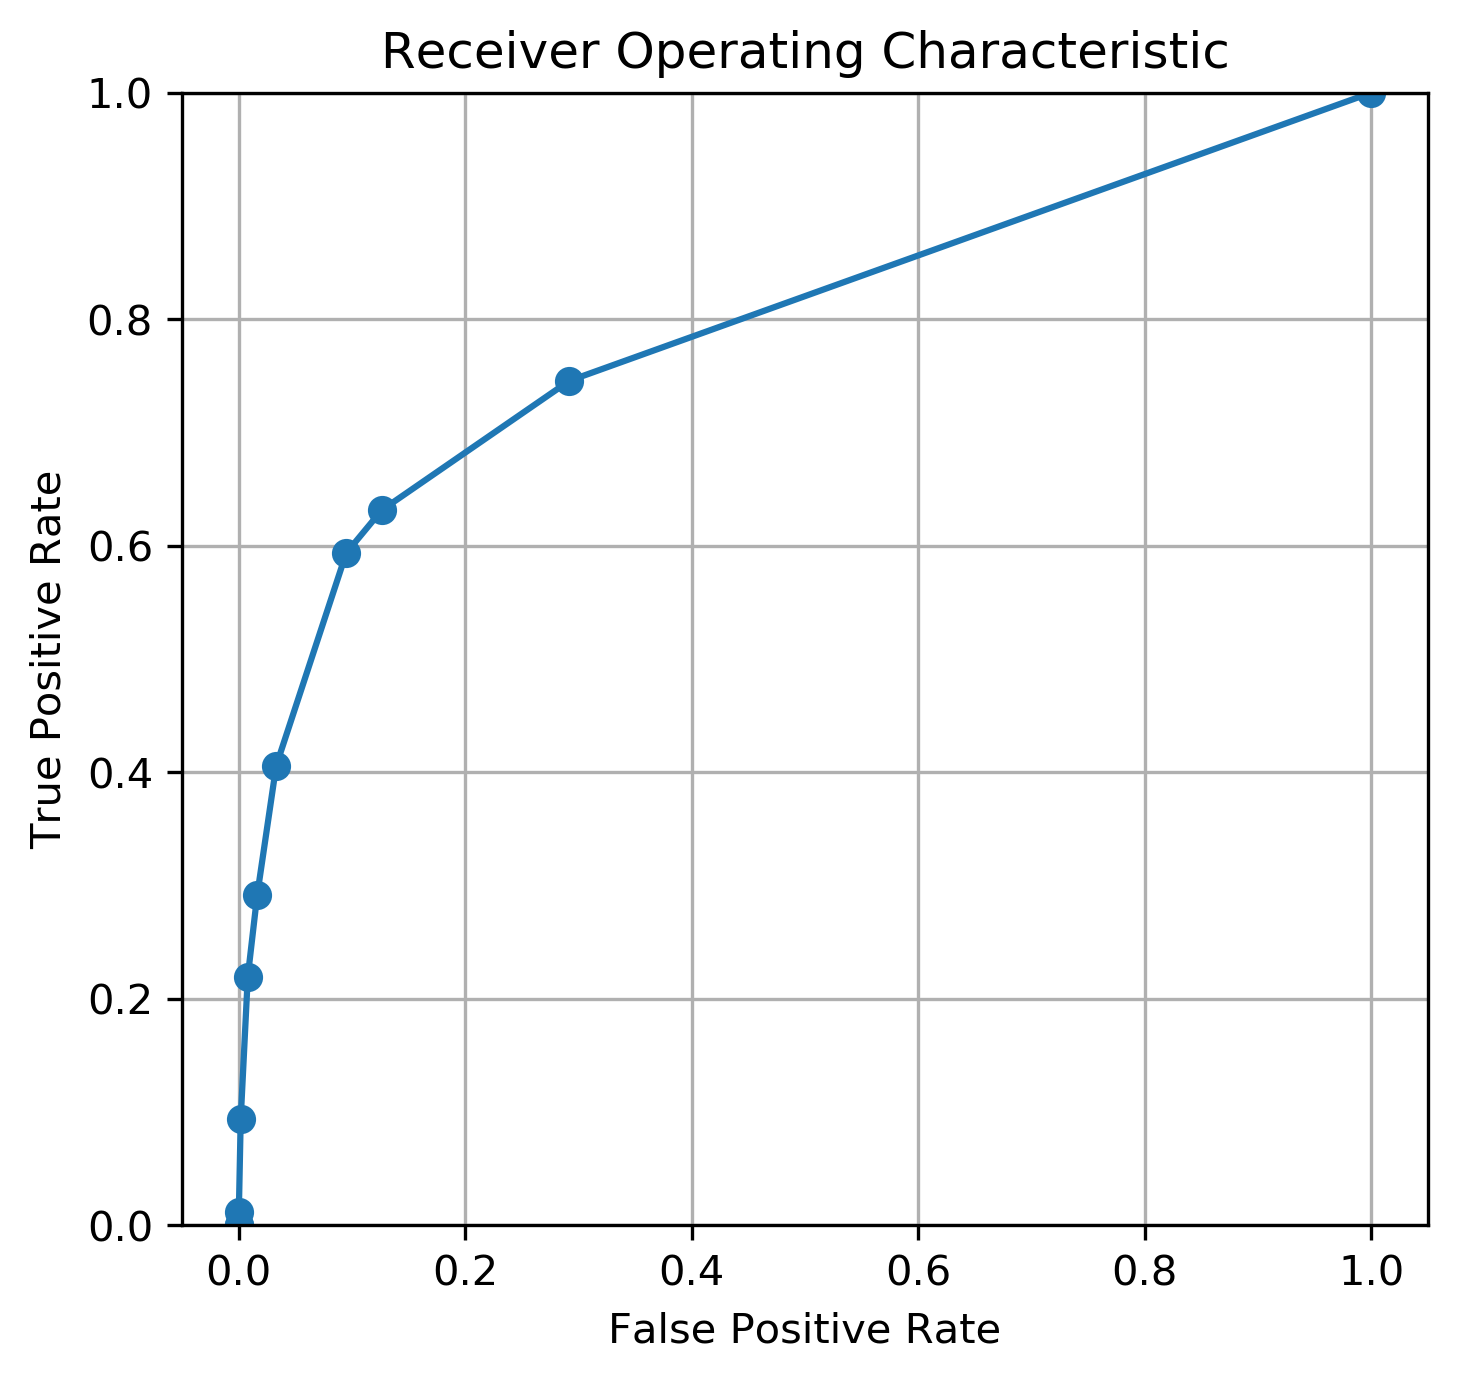

In [70]:


plt.title("Receiver Operating Characteristic")
plt.plot(fpr1, tpr1,'-o')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.axis('square')
plt.grid('on')
plt.ylim((0,1))

